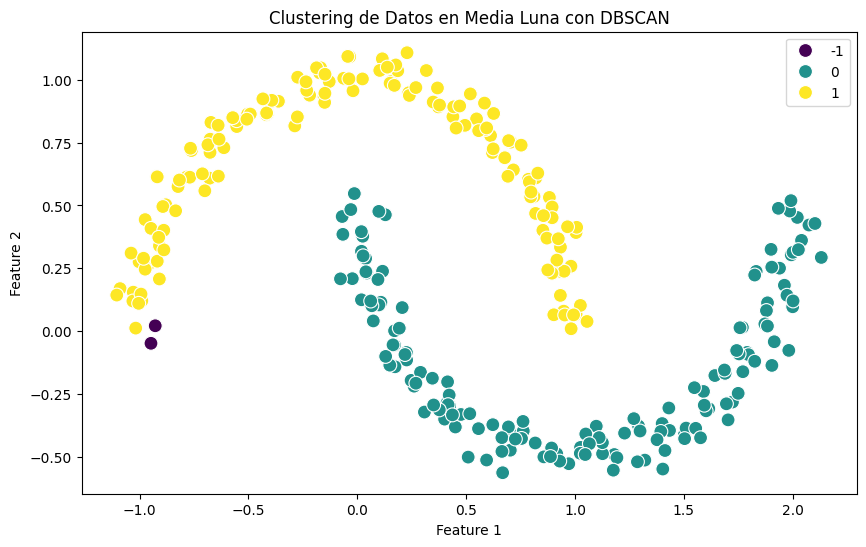

Número de puntos clasificados como ruido: 2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# 📌 Generación de datos en forma de media luna (moon dataset)
np.random.seed(42)  # Para reproducibilidad de resultados
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)  # Datos con ruido

df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

# 📌 Normalización de los datos para evitar sesgos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # Aplicar normalización

# 📌 Aplicar DBSCAN con parámetros óptimos
# eps: Distancia máxima entre puntos para considerarlos en el mismo cluster
# min_samples: Número mínimo de puntos para formar un cluster

modelo_dbscan = DBSCAN(eps=0.2, min_samples=5)  # Ajusta los parámetros según el dataset
df['Cluster'] = modelo_dbscan.fit_predict(df_scaled)  # Asignar etiquetas de clusters

# 📌 Visualización del Clustering DBSCAN
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clustering de Datos en Media Luna con DBSCAN")
plt.legend()
plt.show()

# 📌 Identificación de ruido (valores etiquetados como -1)
num_ruido = sum(df['Cluster'] == -1)
print(f"Número de puntos clasificados como ruido: {num_ruido}")
